In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [3]:
'''The Consumer Complaint Database is a collection of complaints about consumer financial products and services that we sent to companies for response. Complaints are published after the company responds, confirming a commercial relationship with the consumer, or after 15 days, whichever comes first. Complaints referred to other regulators, such as complaints about depository institutions with less than $10 billion in assets, are not published in the Consumer Complaint Database.'''

'The Consumer Complaint Database is a collection of complaints about consumer financial products and services that we sent to companies for response. Complaints are published after the company responds, confirming a commercial relationship with the consumer, or after 15 days, whichever comes first. Complaints referred to other regulators, such as complaints about depository institutions with less than $10 billion in assets, are not published in the Consumer Complaint Database.'

In [4]:
complaints_df = pd.DataFrame()
cols = ['Date received', 
        'Product', 
        'Sub-product', 
        'Issue', 
        'Sub-issue',
        'Consumer complaint narrative', 
        'Company public response', 
        'Company', 
        'State', 
        'Date sent to company', 
        'Company response to consumer', 
        'Timely response?', 
        'Consumer disputed?']
for c in pd.read_csv('data/Consumer_Complaints.csv', chunksize = 10000, header=0, usecols=cols):
    complaints_df = complaints_df.append(c)

In [5]:
complaints_df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?
0,09/20/2019,Debt collection,Other debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"CCS Financial Services, Inc.",IL,09/20/2019,Closed with explanation,Yes,NaN
1,09/20/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with fraud alerts or security freezes,NaN,NaN,NaN,"ONEMAIN FINANCIAL HOLDINGS, LLC.",WA,09/20/2019,In progress,Yes,NaN
2,09/20/2019,Checking or savings account,Checking account,Managing an account,Problem accessing account,NaN,NaN,ALLY FINANCIAL INC.,CA,09/20/2019,In progress,Yes,NaN
3,09/20/2019,Debt collection,Medical debt,Attempts to collect debt not owed,Debt was result of identity theft,NaN,NaN,"Commonwealth Financial Systems, Inc.",NV,09/20/2019,Closed with explanation,Yes,NaN
4,09/20/2019,"Payday loan, title loan, or personal loan",Payday loan,Can't stop withdrawals from your bank account,NaN,NaN,NaN,"Tennessee Quick Cash, Inc.",TN,09/20/2019,In progress,Yes,NaN


In [6]:
print(str(complaints_df.iloc[-1, 0]) + ' - ' + str(complaints_df.iloc[0, 0]))

12/01/2011 - 09/20/2019


### Get complaints from years January 1, 2012 through June 30, 2019

In [7]:
complaints_df['Date received'] = pd.to_datetime(complaints_df['Date received'], format='%m/%d/%Y')
complaints_df['Date sent to company'] = pd.to_datetime(complaints_df['Date sent to company'], format='%m/%d/%Y')
complaints_df_cut = complaints_df[(complaints_df['Date received'] >= pd.to_datetime('01/01/2012', format='%m/%d/%Y')) &
           (complaints_df['Date received'] <= pd.to_datetime('06/30/2019', format='%m/%d/%Y'))]
print(str(complaints_df_cut.iloc[-1, 0]) + ' - ' + str(complaints_df_cut.iloc[0, 0]))

2012-01-01 00:00:00 - 2019-06-30 00:00:00


In [8]:
df_equifax = complaints_df_cut[complaints_df_cut['Company'] == 'EQUIFAX, INC.']
equifax_complaints = df_equifax['Date received'].value_counts()
equifax_complaints = df_equifax.groupby(by=[df_equifax['Date received'].dt.year, 
                                            df_equifax['Date received'].dt.month])['Date received'].value_counts()
equifax_complaints = equifax_complaints.groupby([equifax_complaints.index.get_level_values(0),
                                                equifax_complaints.index.get_level_values(1)]).sum()

In [9]:
print(str(df_equifax.iloc[-1, 0]) + ' - ' + str(df_equifax.iloc[0, 0]))

2012-10-14 00:00:00 - 2019-06-30 00:00:00


In [10]:
equifax_complaints

Date received  Date received
2012           10                127
               11                265
               12                230
2013           1                 271
               2                 372
                                ... 
2019           2                2571
               3                3206
               4                3145
               5                3339
               6                3518
Name: Date received, Length: 81, dtype: int64

In [11]:
equifax_complaints_index = pd.to_datetime({'year': equifax_complaints.index.get_level_values(0),
                                           'month': equifax_complaints.index.get_level_values(1),
                                           'day': 1})

c:\users\suber\appdata\local\programs\python\python37-32\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


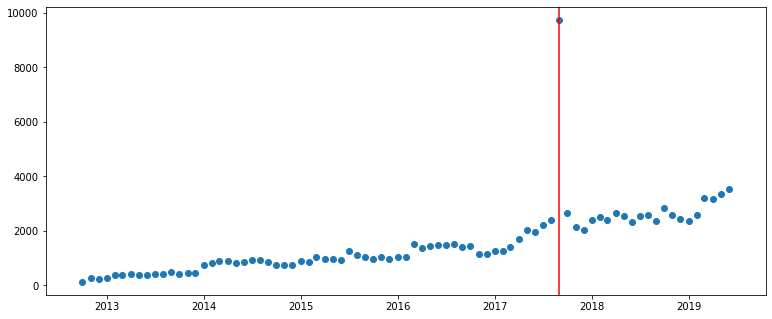

In [12]:
fig = plt.figure(figsize=(10,4))

ax = fig.add_axes([0,0,1,1])
ax.scatter(y = equifax_complaints, x = equifax_complaints_index)
ax.axvline(x=pd.to_datetime('09/01/2017', format='%m/%d/%Y'), color='r')

plt.show()

## Which Financial Institutions have the most complaints per consumer account

In [317]:
import os
accnts_df = pd.DataFrame()
directory = 'data/transaction_accounts'
for file in os.listdir(directory):
    quarter = pd.to_datetime(file.split('_')[2], format='%Y%m%d')
    temp_df = pd.read_csv(os.path.join(directory,file), header=0, usecols=['namehcr', 'trnipcoc'])
    temp_df = temp_df.dropna()
    temp_df['date'] = quarter
    accnts_df = accnts_df.append(temp_df)
accnts_df.columns = ['company', 'num_indiv_accnts', 'date']
accnts_df = pd.DataFrame(accnts_df.groupby(by=['date', 'company']).sum())
accnts_df = accnts_df.reset_index()
accnts_df['company'] = accnts_df['company'].str.strip()

In [318]:
complaints_count = complaints_df_cut[['Date received', 'Company']]
complaints_count = complaints_count.dropna()
complaints_count.columns = ['date', 'company']
# Convert to counts for quarterly
complaints_count = complaints_count.groupby(by=[complaints_count['date'].dt.to_period('Q'), 'company'])['date'].value_counts()
complaints_count = complaints_count.groupby([complaints_count.index.get_level_values(0), complaints_count.index.get_level_values(1)]).sum()
complaints_count = pd.DataFrame(complaints_count)
complaints_count.columns = ['complaints']
complaints_count = complaints_count.reset_index()
complaints_count['company'] = complaints_count['company'].str.strip()


In [319]:
attributes_df = pd.read_csv('data/CSV_ATTRIBUTES_ACTIVE.CSV', header=0, usecols=['#ID_RSSD', 'NM_LGL', 'NM_SHORT'])
attributes_df.columns = ['id', 'company', 'company_short']
attributes_df['company'] = attributes_df['company'].str.strip()
relationships_df = pd.read_csv('data/CSV_RELATIONSHIPS.CSV', header=0, usecols=['#ID_RSSD_PARENT', 'ID_RSSD_OFFSPRING', 'D_DT_END'])
relationships_df.columns = ['id_parent', 'id', 'end_date']
relationships_df['end_year'] = relationships_df['end_date'].str.split().apply(lambda x: x[0]).str.split('/').apply(lambda x: int(x[-1]))
relationships_df.loc[relationships_df['end_year'] == 9999, 'end_date'] = None # Make current relationship end_dates None for datetime conversion
relationships_df['end_date'] = pd.to_datetime(relationships_df['end_date'])

#### Get the ids for the companies and add their parent id if they have one

In [320]:
accnts_df = accnts_df.merge(attributes_df, on='company', how='left')
accnts_df = accnts_df.merge(relationships_df, on='id', how='left')
complaints_count = complaints_count.merge(attributes_df, on='company', how='left')
complaints_count = complaints_count.merge(relationships_df, on='id', how='left')
# Get ids for companies who has no parent, presently has a parent, or had a parent through the data collection date
accnts_df = accnts_df[(accnts_df['end_date'].isnull()) | (accnts_df['date'] < accnts_df['end_date'])]
accnts_df['date'] = accnts_df['date'].dt.to_period('Q') # Convert date to quarterly to reconcile with complaints

In [324]:
child_df = pd.concat([accnts_df[~accnts_df['id_parent'].isnull()], complaints_count[~complaints_count['id_parent'].isnull()]], sort=False)  # Child company has a parent id

In [325]:
child_df

,date,company,num_indiv_accnts,id,company_short,id_parent,end_date,end_year,complaints
5,2012Q1,"1ST ADVANTAGE BANCSHARES, INC.",6706.0,3370517.0,1ST ADVAN BSHRS,4526496.0,NaT,9999.0,NaN
19,2012Q1,"3MV BANCORP, INC.",47521.0,3637939.0,3MV BC,1840753.0,2013-12-30,2013.0,NaN
20,2012Q1,"3MV BANCORP, INC.",47521.0,3637939.0,3MV BC,1840753.0,2015-11-15,2015.0,NaN
28,2012Q1,AB&T FINANCIAL CORPORATION,17799.0,3706684.0,AB&T FC,3032235.0,2014-09-16,2014.0,NaN
29,2012Q1,AB&T FINANCIAL CORPORATION,17799.0,3706684.0,AB&T FC,5216570.0,NaT,9999.0,NaN
...,...,...,...,...,...,...,...,...,...
50656,2019Q2,WORLD ACCEPTANCE CORPORATION,NaN,1073234.0,WORLD ACCEPTANCE CORP,1073225.0,1986-07-14,1986.0,23.0
50657,2019Q2,WORLD ACCEPTANCE CORPORATION,NaN,1073234.0,WORLD ACCEPTANCE CORP,1073551.0,1993-05-17,1993.0,23.0
50658,2019Q2,WORLD ACCEPTANCE CORPORATION,NaN,1073234.0,WORLD ACCEPTANCE CORP,1077081.0,1993-06-02,1993.0,23.0
50659,2019Q2,WORLD ACCEPTANCE CORPORATION,NaN,1073234.0,WORLD ACCEPTANCE CORP,1230970.0,1970-12-30,1970.0,23.0


In [337]:
# complaints_count[complaints_count['id'] == 480228]

# relationships_df[relationships_df['id'] == 480228]
# attributes_df[attributes_df['company'] == 'BANK OF AMERICA, NATIONAL ASSOCIATION']
# accnts_df[accnts_df['id'] == 480228]
child_df[child_df['id'] == 480228].sort_values('end_date')[::-1]
# Recursively add up all subsidiary complaints

,date,company,num_indiv_accnts,id,company_short,id_parent,end_date,end_year,complaints
48713,2019Q2,"BANK OF AMERICA, NATIONAL ASSOCIATION",NaN,480228.0,BANK OF AMER NA,1199769.0,NaT,9999.0,1986.0
46570,2019Q1,"BANK OF AMERICA, NATIONAL ASSOCIATION",NaN,480228.0,BANK OF AMER NA,1199769.0,NaT,9999.0,1409.0
44385,2018Q4,"BANK OF AMERICA, NATIONAL ASSOCIATION",NaN,480228.0,BANK OF AMER NA,1199769.0,NaT,9999.0,1656.0
42086,2018Q3,"BANK OF AMERICA, NATIONAL ASSOCIATION",NaN,480228.0,BANK OF AMER NA,1199769.0,NaT,9999.0,2109.0
39829,2018Q2,"BANK OF AMERICA, NATIONAL ASSOCIATION",NaN,480228.0,BANK OF AMER NA,1199769.0,NaT,9999.0,2384.0
...,...,...,...,...,...,...,...,...,...
8446,2014Q3,"BANK OF AMERICA, NATIONAL ASSOCIATION",NaN,480228.0,BANK OF AMER NA,1073757.0,1982-12-30,1982.0,2642.0
42084,2018Q3,"BANK OF AMERICA, NATIONAL ASSOCIATION",NaN,480228.0,BANK OF AMER NA,1073757.0,1982-12-30,1982.0,2109.0
6882,2014Q2,"BANK OF AMERICA, NATIONAL ASSOCIATION",NaN,480228.0,BANK OF AMER NA,1073757.0,1982-12-30,1982.0,2638.0
5378,2014Q1,"BANK OF AMERICA, NATIONAL ASSOCIATION",NaN,480228.0,BANK OF AMER NA,1073757.0,1982-12-30,1982.0,2721.0


In [229]:
a = child_df.merge(complaints_count.loc[:,['id', 'complaints', 'date']], on=['id', 'date'], how='inner')
a[~a['complaints'].isnull()]

,date,company,num_indiv_accnts,id,company_short,id_parent,end_date,end_year,complaints
0,2012Q1,"CITIZENS FINANCIAL GROUP, INC.",42836,1132449.0,CITIZENS FNCL GRP,3068159.0,2014-09-28,2014.0,116
1,2012Q1,"CITIZENS FINANCIAL GROUP, INC.",42836,1132449.0,CITIZENS FNCL GRP,3068159.0,2014-10-07,2014.0,116
2,2012Q1,"CITIZENS FINANCIAL GROUP, INC.",42836,1132449.0,CITIZENS FNCL GRP,3068159.0,2015-03-29,2015.0,116
3,2012Q1,"CITIZENS FINANCIAL GROUP, INC.",42836,1132449.0,CITIZENS FNCL GRP,3068159.0,2015-04-06,2015.0,116
4,2012Q1,"CITIZENS FINANCIAL GROUP, INC.",42836,1132449.0,CITIZENS FNCL GRP,3068159.0,2015-08-02,2015.0,116
...,...,...,...,...,...,...,...,...,...
70,2015Q1,"CITIZENS FINANCIAL GROUP, INC.",52007,1132449.0,CITIZENS FNCL GRP,3068159.0,2015-08-02,2015.0,180
71,2015Q1,"CITIZENS FINANCIAL GROUP, INC.",52007,1132449.0,CITIZENS FNCL GRP,3068159.0,2015-11-03,2015.0,180
72,2015Q2,"CITIZENS FINANCIAL GROUP, INC.",51182,1132449.0,CITIZENS FNCL GRP,3068159.0,2015-08-02,2015.0,166
73,2015Q2,"CITIZENS FINANCIAL GROUP, INC.",51182,1132449.0,CITIZENS FNCL GRP,3068159.0,2015-11-03,2015.0,166


In [179]:
child_df = accnts_df[~accnts_df['id_parent'].isna()].merge(complaints_count.loc[:,['id', 'complaints']], on='id', how='left')

In [180]:
child_df[~child_df['complaints'].isna()]

,date,company,num_indiv_accnts,id,company_short,id_parent,end_date,end_year,complaints


In [159]:
child_df

,date,company,num_indiv_accnts,company_short,id_parent,end_date,end_year,id,complaints


In [20]:
# Now want to sum up all children company complaints

,#ID_RSSD_PARENT,ID_RSSD_OFFSPRING
0,130,1081305
1,279,3923155
2,505,2913168
3,505,2913168
4,505,3079566
...,...,...
259570,5425194,5425206
259571,5425532,5425505
259572,5425532,5425514
259573,5425532,5425523
